Mean squared error: 0.80
Mean absolute error: 0.68
R-squared: 0.27


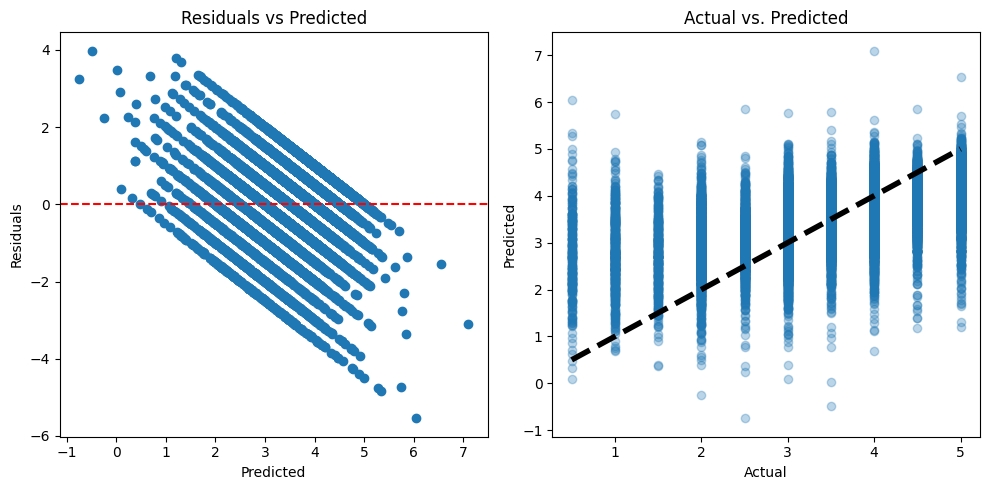

Recommended Movies for User 1 with Predicted Ratings > 4:
                            title  predictedRating
0                Toy Story (1995)         4.595077
1                  Jumanji (1995)         4.143724
2                     Heat (1995)         4.711519
3                GoldenEye (1995)         4.141632
4  American President, The (1995)         4.497033
5                    Nixon (1995)         4.484014


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from scipy import sparse

def load_data():
    ratings_url = "https://raw.githubusercontent.com/BheemisettySaiHarsha/PRML_project/main/PRML%20DATASET/ratings.csv"
    movies_url = "https://raw.githubusercontent.com/BheemisettySaiHarsha/PRML_project/main/PRML%20DATASET/movies.csv"
    ratings = pd.read_csv(ratings_url)
    movies = pd.read_csv(movies_url)
    return ratings, movies

def prepare_data(ratings):
    user_encoder = OneHotEncoder(handle_unknown='ignore')
    movie_encoder = OneHotEncoder(handle_unknown='ignore')
    user_ids = user_encoder.fit_transform(ratings[['userId']])
    movie_ids = movie_encoder.fit_transform(ratings[['movieId']])
    X = sparse.hstack((user_ids, movie_ids))
    y = ratings['rating']
    return X, y, user_encoder, movie_encoder

def train_model(X_train, y_train):
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    return regressor

def evaluate_model(regressor, X_test, y_test):
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean squared error: {mse:.2f}")
    print(f"Mean absolute error: {mae:.2f}")
    print(f"R-squared: {r2:.2f}")
    return y_test, y_pred

def make_recommendations(regressor, user_encoder, movie_encoder, movies, user_id, threshold=4.0):
    user_encoded = user_encoder.transform([[user_id]] * len(movies['movieId']))
    movie_encoded = movie_encoder.transform(movies[['movieId']])
    features = sparse.hstack((user_encoded, movie_encoded))
    predictions = regressor.predict(features)
    recommendations = pd.DataFrame({'movieId': movies['movieId'], 'predictedRating': predictions})
    recommended_movies = recommendations[recommendations['predictedRating'] > threshold]
    recommended_movies = recommended_movies.merge(movies, on='movieId', how='left')
    return recommended_movies[['title', 'predictedRating']]

def plot_results(y_test, y_pred):
    plt.figure(figsize=(10,5))

    # Residuals plot
    plt.subplot(1, 2, 1)
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals)
    plt.title('Residuals vs Predicted')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='red', linestyle='--')

    # Prediction vs Actual plot
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.title('Actual vs. Predicted')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)

    plt.tight_layout()
    plt.show()

def main():
    ratings, movies = load_data()
    X, y, user_encoder, movie_encoder = prepare_data(ratings)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    regressor = train_model(X_train, y_train)
    y_test, y_pred = evaluate_model(regressor, X_test, y_test)
    plot_results(y_test, y_pred)

    # Provide recommendations for a given user
    user_id = 1  # Example user ID
    recommended_movies = make_recommendations(regressor, user_encoder, movie_encoder, movies, user_id)
    print(f"Recommended Movies for User {user_id} with Predicted Ratings > 4:\n{recommended_movies[0:6]}")

if __name__ == "__main__":
    main()
